In [1]:
# only applicable for Colab
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [1]:
# import tensorflow and verify environment
import tensorflow as tf

print(tf.__version__)
print(tf.test.is_gpu_available())

2.0.0
True


In [2]:
# other imports
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import shutil
import cv2
import os

In [3]:
# get the Flowers-17 dataset
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [4]:
# verify the directory
!ls {flowers}

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


The folders denote the labels of the dataset. We will be using `imutils` (a Python library from PyImageSearch for utility computer vision tasks). 

In [5]:
# there are a total of ____ images
total_data = len(list(paths.list_images(flowers)))
total_data

3670

In [6]:
# preview some image paths
image_paths = list(paths.list_images(flowers))
image_paths[:5]

['/home/jupyter/.keras/datasets/flower_photos/daisy/7630520686_e3a61ac763.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/daisy/5973488341_50bdf6cee3_n.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/daisy/8709110478_60d12efcd4_n.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/daisy/1306119996_ab8ae14d72_n.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/daisy/2713919471_301fcc941f.jpg']

We won't want our model to be biased on the order of the images, it should only focus on the contents of the images while it is learning. So, it's a good idea to shuffle the images to prevent our model from learning about any kind order related bias. 

In [7]:
# shuffle the image paths and preview
random.shuffle(image_paths)
image_paths[:5]

['/home/jupyter/.keras/datasets/flower_photos/dandelion/7249354462_21925f7d95_n.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/daisy/21402054779_759366efb0_n.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/tulips/12616825773_9aa4245b57_n.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/roses/2607130050_9c34310004.jpg',
 '/home/jupyter/.keras/datasets/flower_photos/sunflowers/15218421476_9d5f38e732_m.jpg']

Let's visualize a few images. 

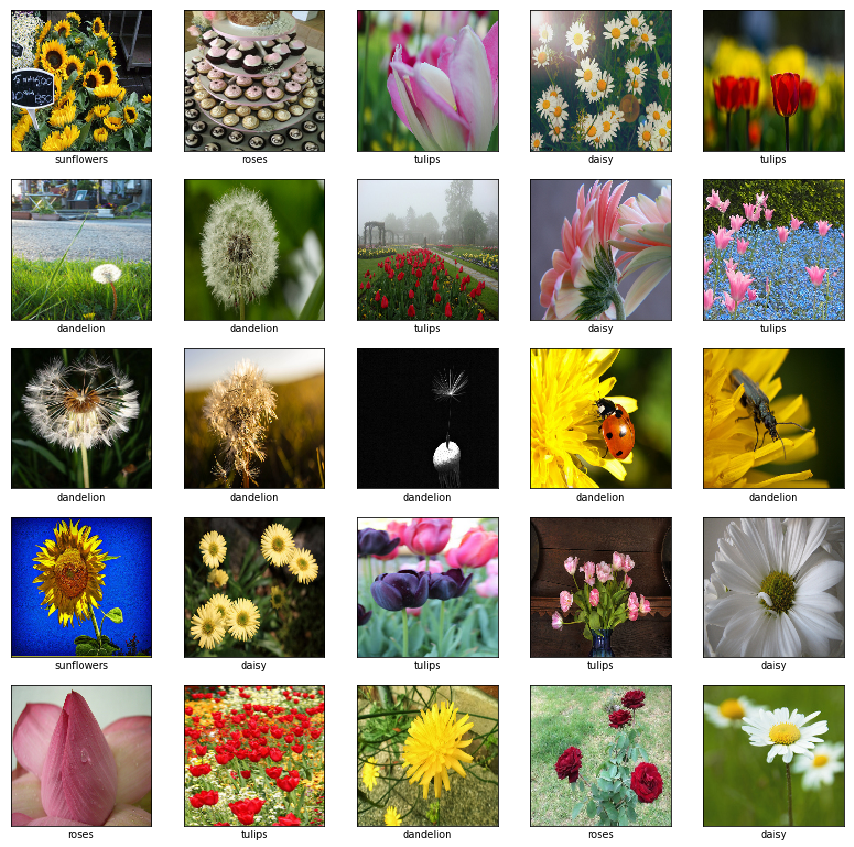

In [8]:
plt.figure(figsize=(15,15))
for i in range(25):
    image_path = np.random.choice(image_paths)
    image = plt.imread(image_path)
    image = cv2.resize(image, (128, 128))
    # you might want to verify the labels before 
    # you put this to use
    label = image_path.split("/")[6]
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(image)
    plt.xlabel(label)
plt.show()

While resizing the images we should also ensure the aspect ratio of the images is being maintained. This allows a CNN to learn more discriminative and consistent features from the supplied (resized) images. While we are performing this step here in this notebook you might want to incorporate it in your own works. In literature, this is referred to as _aspect aware preprocessing_.

We are going to split the images in a 85:15 ratio (train:test). 

In [9]:
# going for a 0.15 test split
nb_test_images = int(len(list(paths.list_images(flowers))) * 0.15)
nb_train_images = len(list(paths.list_images(flowers))) - nb_test_images

In [10]:
# specify the directory paths
train_dir = "train"
test_dir = "test"

In [11]:
def move_images(nb_images, output_dir):
    # iterate through the number of images
    for i in tqdm(range(nb_images)):
        # grab an image path and grab the label of the image
        image_path = image_paths[i]
        # careful about the index of the split
        label = image_path.split("/")[6]
        
        # check if a directory for the label exists, if not create it
        new_image_dir = os.path.join(output_dir, label)
        if not os.path.exists(new_image_dir):
            os.makedirs(new_image_dir)
            
        # copy the current image to the respective folder
        shutil.copy2(image_path, new_image_dir)

In [12]:
# prepare the train and test set
move_images(nb_train_images, train_dir)
move_images(nb_test_images, test_dir)

100%|██████████| 550/550 [00:00<00:00, 7359.98it/s]


The final structure of the dataset looks like the following:

In [ ]:
# in case the system does not have `tree` installed
# !sudo apt-get install tree

In [13]:
!tree --dirsfirst --filelimit 10 train

train
├── daisy [537 entries exceeds filelimit, not opening dir]
├── dandelion [769 entries exceeds filelimit, not opening dir]
├── roses [552 entries exceeds filelimit, not opening dir]
├── sunflowers [590 entries exceeds filelimit, not opening dir]
└── tulips [672 entries exceeds filelimit, not opening dir]

5 directories, 0 files


In [14]:
!tree --dirsfirst --filelimit 10 test

test
├── daisy [91 entries exceeds filelimit, not opening dir]
├── dandelion [134 entries exceeds filelimit, not opening dir]
├── roses [101 entries exceeds filelimit, not opening dir]
├── sunflowers [111 entries exceeds filelimit, not opening dir]
└── tulips [113 entries exceeds filelimit, not opening dir]

5 directories, 0 files


We have an even distribution of the classes in both the sets. 